In [9]:
using DynamicalSystems, CausalityTools, Plots

# Tutorial: `SMeasureTest` on scalar time series


Create an orbit of the built-in unidirectionally coupled `henon2` map system, and 
a pair of random time series.


In [10]:
npts, Ttr = 5000, 500
x, y = columns(trajectory(henon2(c_xy = 1.0), npts, Ttr = Ttr));
xr, yr = rand(npts), rand(npts)

([0.06047720866606543, 0.2042020949276202, 0.799243612872423, 0.604299395647649, 0.7066620570949824, 0.918111879740446, 0.5735712011741945, 0.8443328690836227, 0.0428955132136446, 0.8167883196638219  …  0.598875285755049, 0.4441653712468403, 0.2419189319594761, 0.7438027432188095, 0.1270917635465696, 0.46884030253481934, 0.7931842360426602, 0.4896695105563391, 0.5815715586345216, 0.00802154153629031], [0.5060586122083379, 0.174578869250539, 0.35014862730950624, 0.866298608817438, 0.7891752970125123, 0.1898802427044166, 0.6336787811911948, 0.3744535438145873, 0.5653085188009537, 0.24683548816023948  …  0.6826378945235083, 0.9802782373959371, 0.39365718627369173, 0.5431209498047567, 0.46405840539012644, 0.5092005349692952, 0.3456176631816754, 0.34617822620783434, 0.6584501332978847, 0.8776382881953004])

Initialise test, specifying embedding dimension, emebdding lag and number of 
nearest neighbors.

In [11]:
Ks = 2:10
test = SMeasureTest(m = 4, τ = 1, K = Ks)

SMeasureTest(m = 4, τ = 1, K = 2:10, metric = Distances.SqEuclidean(0.0), tree_metric = Euclidean(0.0))

Compute S-measure statistic separately in both directions, both for the 
random time series, and for the Henon maps. The test will return a vector 
of length `Ks`.

In [12]:
Ss_r_xy = causality(xr, yr, test)
Ss_r_yx = causality(yr, xr, test)
Ss_henon_xy = causality(x, y, test)
Ss_henon_yx = causality(y, x, test);

Plot the results.

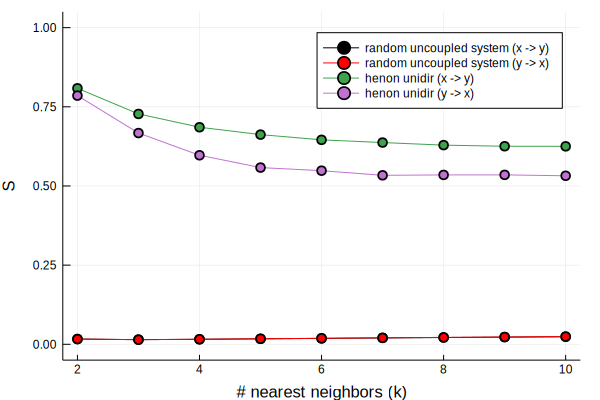

In [13]:
plot(xlabel = "# nearest neighbors (k)", ylabel = "S", ylims = (-0.05, 1.05))
plot!(Ks, Ss_r_xy,  label = "random uncoupled system (x -> y)", marker = stroke(2), c = :black)
plot!(Ks, Ss_r_yx,  label = "random uncoupled system (y -> x)", marker = stroke(2), c = :red)
plot!(Ks, Ss_henon_xy, marker = stroke(2), label = "henon unidir (x -> y)")
plot!(Ks, Ss_henon_yx, marker = stroke(2), label = "henon unidir (y -> x)")

For uncoupled systems, the value of $S$ is expected to be close to zero. For coupled systems, however, $S$ higher. For the random time series, we get the expected result. For the Henon maps, we get the highest value of $S$ for the causal direction ($x \to y$). We also get a signal in the opposite direction  ($y \to x$), but it is lower than for  $x \to y$.